In [174]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [175]:
btc = pd.read_csv("BTC-USD.csv")
eth = pd.read_csv("ETH-USD.csv")

btc['Date'] = pd.to_datetime(btc['Date']).dropna()
eth['Date'] = pd.to_datetime(eth['Date']).dropna()

In [176]:
btc = btc[btc['Date'] >= eth['Date'].iloc[0]]

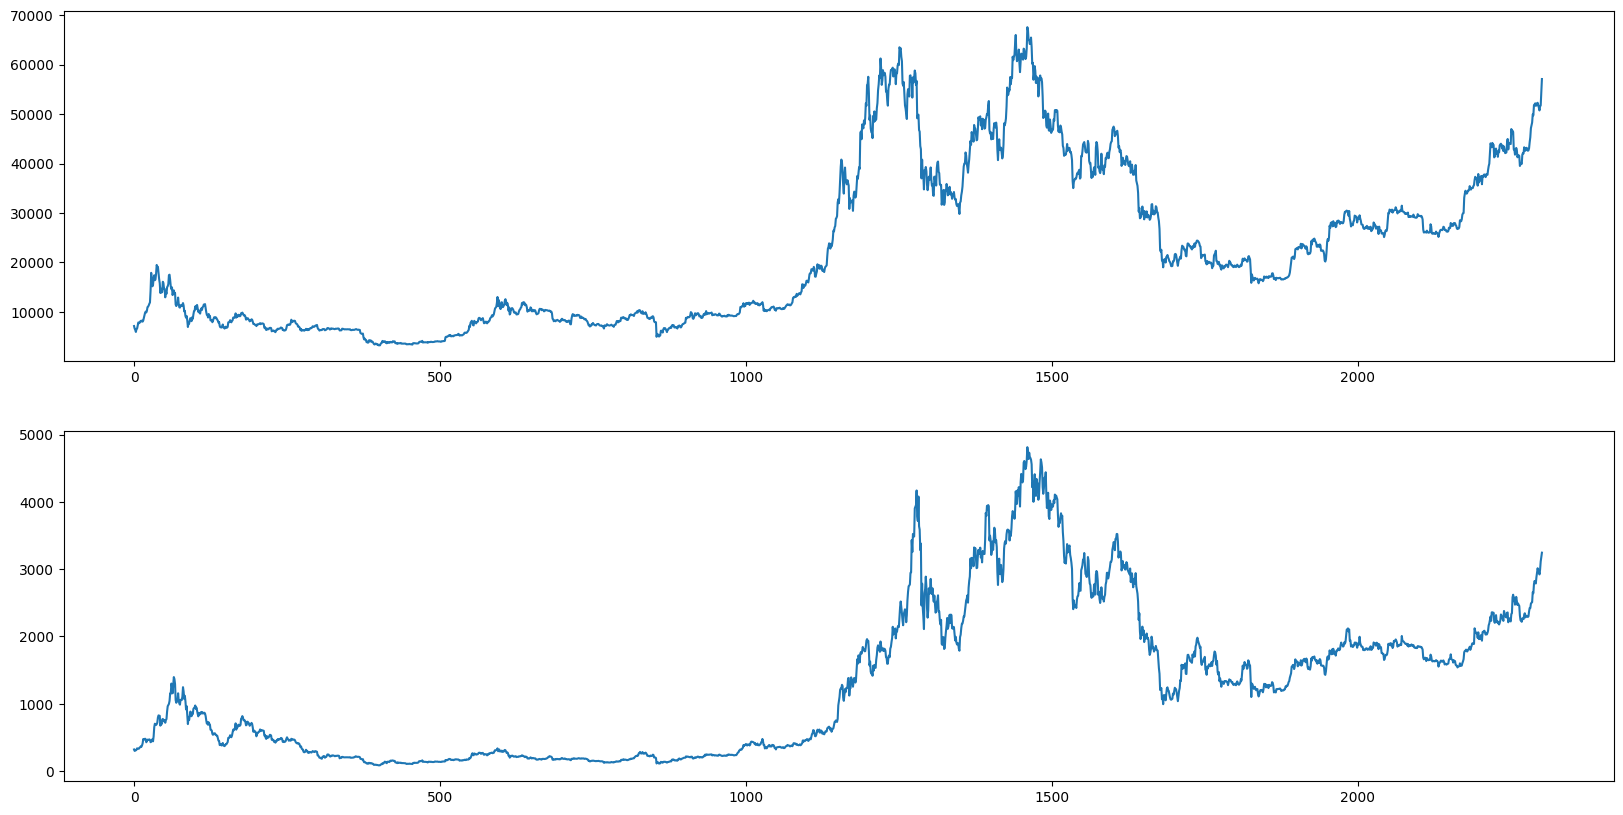

In [177]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

btc_close = btc['Close'].values
eth_close = eth['Close'].values

ax[0].plot(btc_close)
ax[1].plot(eth_close)

In [178]:
X = np.vstack([eth_close, btc_close])[:, :-3]

In [179]:
np.corrcoef(X)

array([[1.        , 0.92580692],
       [0.92580692, 1.        ]])

In [180]:
X = X.T - X.T.mean(axis=0)

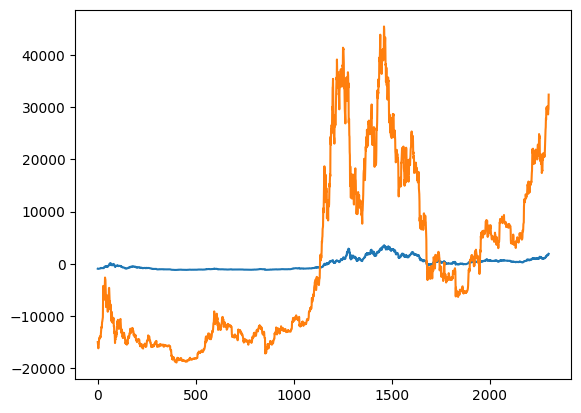

In [185]:
plt.plot(X[:, 0])#* X[:, 1].std())
plt.plot(X[:, 1])

corr = [[1.       0.711784]
 [0.711784 1.      ]]


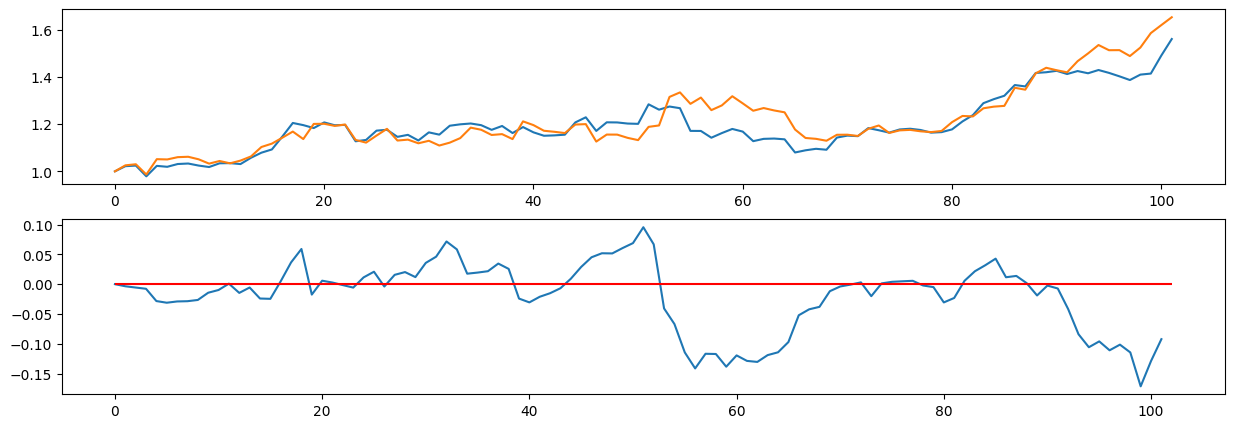

In [283]:
t = 2200

btc_change = ((btc_close[t:] - np.roll(btc_close[t:], 1)) / np.roll(btc_close[t:], 1))[1:-2]
eth_change = ((eth_close[t:] - np.roll(eth_close[t:], 1)) / np.roll(eth_close[t:], 1))[1:-2]

print(f"corr = {np.corrcoef([btc_change.T, eth_change.T])}")

btc = np.empty(len(btc_change) + 1)
eth = np.empty(len(eth_change) + 1)

btc[0] = 1
eth[0] = 1

for ix, (b, e) in enumerate(zip(btc_change, eth_change)):
    btc[ix+1] = btc[ix] * (1 + b)
    eth[ix+1] = eth[ix] * (1 + e)

fig, ax = plt.subplots(2, 1, figsize=(15, 5))
ax[0].plot(btc)
ax[0].plot(eth)
ax[1].plot(btc - eth)
ax[1].hlines(0, 0, len(btc), color='red')

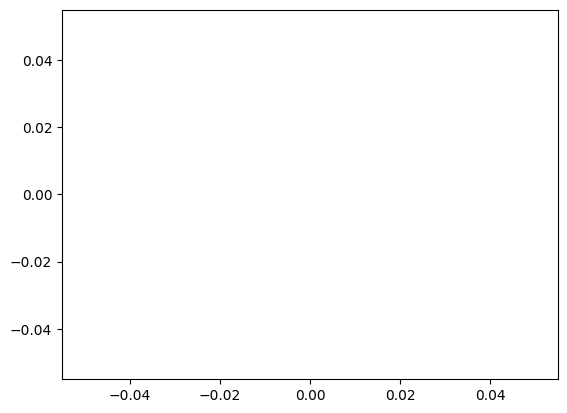

In [269]:
t = 2200
plt.plot(btc[t:t+30], label='btc')
plt.plot(eth[t:t+30], label='eth')

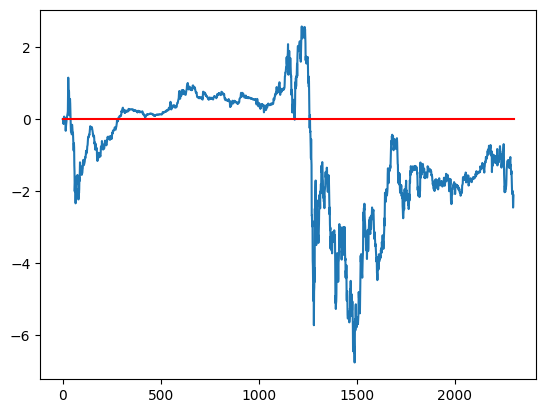

In [244]:
spread = btc - eth
plt.plot(spread)
plt.plot([0, len(btc)], [0, 0], color='red')

2273